<a href="https://www.kaggle.com/code/omarsaad34/digit-recognizer?scriptVersionId=105424912" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Imports
---

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPool2D,Dropout

Read Dataset
---

In [4]:
train_df = pd.read_csv('../input/digit-recognizer/train.csv')
test_df = pd.read_csv('../input/digit-recognizer/test.csv')

In [8]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_labels = train_df['label']
train_features = train_df.values[:,1:]

In [89]:
# test_labels = test_df['label']
# test_features = test_df.values[:,1:]

KeyError: 'label'

Conver integer labels to binary matrix

In [9]:
train_labels = tf.keras.utils.to_categorical(train_labels)

In [10]:
print(train_features.shape)
print(train_labels.shape)

(42000, 784)
(42000, 10)


In [13]:
train_features = train_features.reshape(len(train_features) , 28 , 28,1)
train_features.shape

(42000, 28, 28, 1)

Show Some images
---

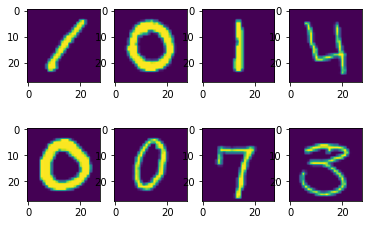

In [14]:
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(train_features[i])
plt.show()

In [131]:
train_features.shape

(42000, 28, 28, 1)

CNN model
---

In [16]:
model = Sequential()
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(16,kernel_size=3,activation='relu',padding='same'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

model.compile(
    optimizer='adam',
    loss= keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 16)          4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 144)              

In [18]:
history = model.fit(train_features, train_labels, batch_size=64, epochs=50,
                validation_split = 0.2)

2022-09-11 16:06:00.553785: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/50
525/525 [==============================] - 18s 33ms/step - loss: 0.5060 - accuracy: 0.8647 - val_loss: 0.1107 - val_accuracy: 0.9660
Epoch 2/50
525/525 [==============================] - 17s 33ms/step - loss: 0.1305 - accuracy: 0.9595 - val_loss: 0.0680 - val_accuracy: 0.9790
Epoch 3/50
525/525 [==============================] - 17s 32ms/step - loss: 0.1002 - accuracy: 0.9677 - val_loss: 0.0793 - val_accuracy: 0.9751
Epoch 4/50
525/525 [==============================] - 18s 34ms/step - loss: 0.0807 - accuracy: 0.9735 - val_loss: 0.0582 - val_accuracy: 0.9824
Epoch 5/50
525/525 [==============================] - 21s 39ms/step - loss: 0.0715 - accuracy: 0.9774 - val_loss: 0.0504 - val_accuracy: 0.9843
Epoch 6/50
525/525 [==============================] - 21s 40ms/step - loss: 0.0652 - accuracy: 0.9789 - val_loss: 0.0436 - val_accuracy: 0.9877
Epoch 7/50
525/525 [==============================] - 20s 39ms/step - loss: 0.0549 - accuracy: 0.9821 - val_loss: 0.0490 - val_accuracy:

In [19]:
features_test = test_df.values
features_test = features_test.reshape(features_test.shape[0],28,28,1)

In [28]:
pred= model.predict(features_test)

In [29]:
pred = np.argmax(pred,axis=1)

In [30]:
print(pred)

[2 0 9 ... 3 9 2]


In [32]:
output = pd.DataFrame({'ImageId': test_df.index + 1, 'Label': pred.flatten()})
output.to_csv('submission.csv',index=False)
output


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
